In [ ]:
https://hourlypricing.comed.com

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

import requests
import json
#import numpy as np
from datetime import datetime,fromtimestamp,utcnow,tzinfo,timezone,timedelta
import matplotlib.pyplot as plt
%matplotlib inline

hourlyPricingUrl = "

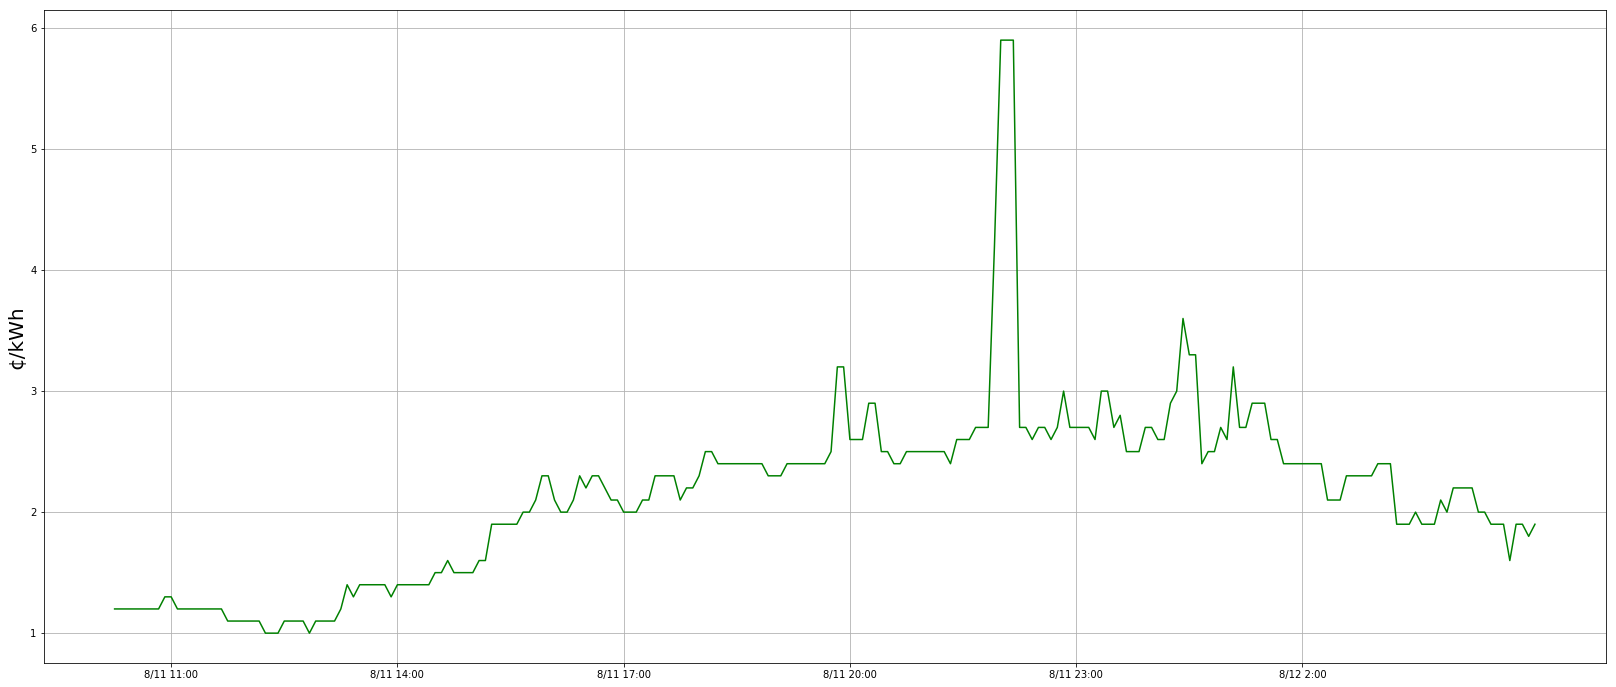

In [281]:
def utc_2_cst_str(millis):
    utcOffset = +6
    dttm = datetime.fromtimestamp(millis)+timedelta(hours=utcOffset)
    return '{}/{} {}:{:02}'.format(dttm.month,dttm.day, dttm.hour, dttm.minute)

startOffsetHrs = 24
endOffsetHrs = 0

feedType = '5minutefeed'
nowUtc = datetime.utcnow()
tmNow = nowUtc-timedelta(hours=endOffsetHrs)
tmStrt = nowUtc-timedelta(hours=startOffsetHrs)

dateStart = '{}{:02}{:02}{:02}{:02}'.format(tmStrt.year,tmStrt.month,tmStrt.day,tmStrt.hour,tmStrt.minute)
dateEnd = '{}{:02}{:02}{:02}{:02}'.format(tmNow.year,tmNow.month,tmNow.day,tmNow.hour,tmNow.minute)


pricingUrl='https://hourlypricing.comed.com/api'
rUrl = '{0}?type={1}&format=json&datestart={2}&dateend={3}'.format(pricingUrl,feedType,dateStart,dateEnd)
# rUrl = '{0}?type={1}'.format(pricingUrl,feedType)
r = requests.get(rUrl)

if r.status_code == 200 and r.content != b'[]\n':
    rJson=r.json()

    times = [int(elem['millisUTC'])//1000 for elem in rJson]
    prices = [float(elem['price']) for elem in rJson]


    fig = plt.figure(figsize=(28,12))
    ax = fig.add_subplot(111)
    plt.grid(True)

    ax.plot(times, prices, color='green', linestyle='-')

    tmStart = (60-datetime.fromtimestamp(times[-1]).minute)//5
    tmStep = 72*12//288*12 
    tmTicks = times[-1-tmStart:1:-tmStep]
    ax.set_xticks(tmTicks)
    ax.set_xticklabels([utc_2_cst_str(t) for t in tmTicks])
    
    ax.set_ylabel('¢/kWh',fontsize=20)

    plt.show()
else:
    print('failed')

In [264]:
tmpTm = datetime.fromtimestamp(times[-1])
tmpTm 

datetime.datetime(2019, 8, 9, 3, 30)

In [185]:
now-timedelta(hours=6)

datetime.datetime(2019, 8, 11, 19, 56, 2, 924448)

In [269]:
rUrl='{0}?type={1}'.format(hourlyPricingUrl,feedType)
rr = requests.get(rUrl)

In [274]:
rr.json()

[{'millisUTC': '1565582400000', 'price': '1.8'},
 {'millisUTC': '1565582100000', 'price': '1.9'},
 {'millisUTC': '1565581800000', 'price': '1.9'},
 {'millisUTC': '1565581500000', 'price': '1.6'},
 {'millisUTC': '1565581200000', 'price': '1.9'},
 {'millisUTC': '1565580900000', 'price': '1.9'},
 {'millisUTC': '1565580600000', 'price': '1.9'},
 {'millisUTC': '1565580300000', 'price': '2.0'},
 {'millisUTC': '1565580000000', 'price': '2.0'},
 {'millisUTC': '1565579700000', 'price': '2.2'},
 {'millisUTC': '1565579400000', 'price': '2.2'},
 {'millisUTC': '1565579100000', 'price': '2.2'},
 {'millisUTC': '1565578800000', 'price': '2.2'},
 {'millisUTC': '1565578500000', 'price': '2.0'},
 {'millisUTC': '1565578200000', 'price': '2.1'},
 {'millisUTC': '1565577900000', 'price': '1.9'},
 {'millisUTC': '1565577600000', 'price': '1.9'},
 {'millisUTC': '1565577300000', 'price': '1.9'},
 {'millisUTC': '1565577000000', 'price': '2.0'},
 {'millisUTC': '1565576700000', 'price': '1.9'},
 {'millisUTC': '1565

In [275]:
rJson

[{'millisUTC': '1565582400000', 'price': '1.8'},
 {'millisUTC': '1565582100000', 'price': '1.9'},
 {'millisUTC': '1565581800000', 'price': '1.9'},
 {'millisUTC': '1565581500000', 'price': '1.6'},
 {'millisUTC': '1565581200000', 'price': '1.9'},
 {'millisUTC': '1565580900000', 'price': '1.9'},
 {'millisUTC': '1565580600000', 'price': '1.9'},
 {'millisUTC': '1565580300000', 'price': '2.0'},
 {'millisUTC': '1565580000000', 'price': '2.0'},
 {'millisUTC': '1565579700000', 'price': '2.2'},
 {'millisUTC': '1565579400000', 'price': '2.2'},
 {'millisUTC': '1565579100000', 'price': '2.2'},
 {'millisUTC': '1565578800000', 'price': '2.2'},
 {'millisUTC': '1565578500000', 'price': '2.0'},
 {'millisUTC': '1565578200000', 'price': '2.1'},
 {'millisUTC': '1565577900000', 'price': '1.9'},
 {'millisUTC': '1565577600000', 'price': '1.9'},
 {'millisUTC': '1565577300000', 'price': '1.9'},
 {'millisUTC': '1565577000000', 'price': '2.0'},
 {'millisUTC': '1565576700000', 'price': '1.9'},
 {'millisUTC': '1565

In [206]:
r.status_code

200

In [201]:
dateEnd

'201908101406'